# Classify Song Genres from Audio Data
### Final Project

## Task-1: Preparing our Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
track = pd.read_csv('fma-rock-vs-hiphop.csv')
echonest_metrics = pd.read_json('echonest-metrics.json',precise_float = True)

In [3]:
track.head(2)

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky


In [4]:
echonest_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [5]:
echo_tracks = pd.merge(left = track[['track_id', 'genre_top']], right=echonest_metrics, on='track_id')

In [6]:
echo_tracks.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [7]:
echo_tracks.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,30164.871720,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,28592.013796,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,2.000000,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,7494.250000,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,20723.500000,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,44240.750000,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,124722.000000,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


In [8]:
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   genre_top         4802 non-null   object 
 2   acousticness      4802 non-null   float64
 3   danceability      4802 non-null   float64
 4   energy            4802 non-null   float64
 5   instrumentalness  4802 non-null   float64
 6   liveness          4802 non-null   float64
 7   speechiness       4802 non-null   float64
 8   tempo             4802 non-null   float64
 9   valence           4802 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


## Task-2: Pairwise relationships between continuous variables

In [9]:
corr_matrix = echo_tracks.corr(method='pearson')
corr_matrix.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


## Task-3: Normalizing the feature data

In [10]:
# Define our features 
features = echo_tracks.drop(['genre_top', 'track_id'], axis=1)

In [11]:
# Define our labels
labels = echo_tracks['genre_top']

In [12]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

In [13]:
# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)
pd.DataFrame(scaled_train_features).head()

,0,1,2,3,4,5,6,7
0,1.361706,-0.985896,1.453323,0.979975,-0.442757,-0.364157,-1.072003,-1.573102
1,1.312342,-0.455681,-2.463985,0.937757,-0.496436,-0.498224,-2.145066,-1.567050
2,1.343645,-1.604002,1.176091,0.964802,1.165836,-0.118903,-1.022854,-1.571949
3,1.363976,-1.147674,0.400404,-0.905888,-0.635199,-0.352735,-0.951969,-1.594372
4,1.085570,-0.752319,0.488500,0.841695,-0.321565,-0.110309,-0.847319,-1.424831


## Task-4: Principal Component Analysis on our scaled data

In [14]:
# This is just to make plots appear in the notebook
%matplotlib inline

In [15]:
# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [16]:
# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

Text(0.5, 0, 'Principal Component #')

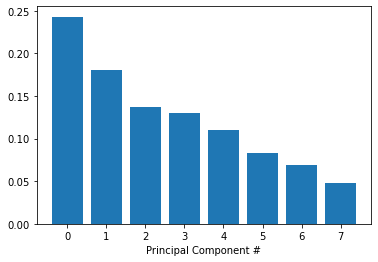

In [17]:
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(8), exp_variance)
ax.set_xlabel('Principal Component #')

## Task-5: Further Visualization of PCA

### The above Scree plot does not gave us a clear Elbow, So we are going with Cumulative Explained Variance Plot

In [18]:
# Get our explained variance ratios from PCA using all features
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(scaled_train_features)

PCA()

In [19]:
exp_variance=pca.explained_variance_ratio_
cum_exp_variance=np.cumsum(exp_variance)
cum_exp_variance

array([0.24297674, 0.4234199 , 0.55992299, 0.68986388, 0.80042636,
       0.88344881, 0.95268664, 1.        ])

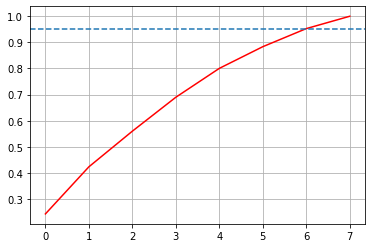

In [20]:
# Plot the cumulative explained variance and draw a dashed line at 0.95.
fig,ax=plt.subplots()
ax.plot(cum_exp_variance,color='r')
ax.axhline(y=0.95,linestyle='--')
plt.grid()
plt.show()

### From the above plot we can see optimal number of features needed is 6, so we assign 6 for n_components for PCA

In [21]:
n_components = 6

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

In [22]:
pca_projection.shape

(4802, 6)

## Task-6: Train a Decision Tree to Classify Genre

In [23]:
# Splitting data to Train and Test
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(pca_projection,labels,test_size=0.3)

In [24]:
# Model Building
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(features_train,labels_train)
dtc_pred=dtc.predict(features_test)

In [25]:
# Calculating Accuracy Score of the Model
from sklearn.metrics import accuracy_score
score=accuracy_score(labels_test,dtc_pred)
score

0.8584316446911867

In [26]:
# Comparing both original and predicted  labels for valuation
output=dtc.predict(pca_projection)
Genre=pd.DataFrame({"Genre Actual":labels,"Genre Predicted":output})
Genre.head()

,Genre Actual,Genre Predicted
0,Rock,Hip-Hop
1,Rock,Rock
2,Rock,Rock
3,Rock,Rock
4,Rock,Rock


### Although our tree's performance is decent, it's a bad idea to immediately assume that, its therefore the perfect tool for this job -- there's always the possibility of other models that will perform even better! It's always a worthwhile idea to at least test a few other algorithms and find the one that's best for our data.


## Task-7: Building a Logistic Model and  Comparing it with Decision Tree

In [27]:
# Importing a logistic regression
from sklearn.linear_model import LogisticRegression

In [28]:
# Training the logistic model 
lr=LogisticRegression()
lr.fit(features_train,labels_train) 
lr_pred=lr.predict(features_test)

In [29]:
from sklearn.metrics import accuracy_score
score=accuracy_score(labels_test,lr_pred)
score

0.8813324080499653

In [30]:
# Importing a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(features_train,labels_train)
dtc_pred=dtc.predict(features_test)

In [31]:
from sklearn.metrics import accuracy_score
score=accuracy_score(labels_test,dtc_pred)
score

0.8528799444829979

### Thus we can observe that the accuracy score of the logistic model (88.2%) is little  higher than that of decision tree (85.3%)

In [32]:
from sklearn.metrics import classification_report
report_tree=classification_report(labels_test,dtc_pred)
report_logit=classification_report(labels_test,lr_pred)
print(" DECISION TREE CLASSIFICATION REPORT:\n", report_tree)
print(" LOGISTIC MODEL CLASSIFICATION REPORT:\n", report_logit)

 DECISION TREE CLASSIFICATION REPORT:
               precision    recall  f1-score   support

     Hip-Hop       0.57      0.66      0.61       256
        Rock       0.92      0.89      0.91      1185

    accuracy                           0.85      1441
   macro avg       0.75      0.78      0.76      1441
weighted avg       0.86      0.85      0.86      1441

 LOGISTIC MODEL CLASSIFICATION REPORT:
               precision    recall  f1-score   support

     Hip-Hop       0.74      0.52      0.61       256
        Rock       0.90      0.96      0.93      1185

    accuracy                           0.88      1441
   macro avg       0.82      0.74      0.77      1441
weighted avg       0.87      0.88      0.87      1441



## Task-8: Balance our Data for Greater Performance

### Both our models do similarly well, boasting an average precision of 87% each. However, looking at our classification report, we can see that rock songs are fairly well classified, but hip-hop songs are disproportionately misclassified as rock songs.

In [33]:
# Subsetting the hip-hop tracks and then subsetting the rock tracks.
hhop_tracks=echo_tracks.loc[echo_tracks['genre_top']== 'Hip-Hop']
rock_tracks=echo_tracks.loc[echo_tracks['genre_top']== 'Rock']


In [34]:
# Balancing the no of rock song with the no of hip-hop songs
rock_tracks=rock_tracks.sample(n=len(hhop_tracks))

In [35]:
# Now we are merging the dataframe of hhop_track and rock_tracks
final_rock_hop=pd.concat([hhop_tracks,rock_tracks])

In [36]:
# The features ,labels and pca projection are created for the final balanced dataframe
features = final_rock_hop.drop(['genre_top', 'track_id'], axis=1) 
labels = final_rock_hop['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(features))

In [37]:
# Splitting the final balanced data into test and train with the pca_projection.
features_train,features_test,labels_train,labels_test= train_test_split(pca_projection,labels)

## Task-9 : Does balancing our dataset improve model bias?

In [38]:
# Train our decision tree on the balanced data
dtc = DecisionTreeClassifier(random_state=10)
dtc.fit(features_train,labels_train)
pred_labels_tree = dtc.predict(features_test)

# Train our logistic regression and predict labels for the test set
lr = LogisticRegression(random_state=10)
lr.fit(features_train, labels_train)
pred_labels_logit = lr.predict(features_test)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(labels_test, pred_labels_tree)
class_rep_log = classification_report(labels_test, pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.78      0.77      0.77       236
        Rock       0.75      0.76      0.76       219

    accuracy                           0.76       455
   macro avg       0.76      0.76      0.76       455
weighted avg       0.76      0.76      0.76       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.86      0.85       236
        Rock       0.85      0.82      0.83       219

    accuracy                           0.84       455
   macro avg       0.84      0.84      0.84       455
weighted avg       0.84      0.84      0.84       455



### Thus we can see that balancing our data has removed bias towards the more prevalent class. To get a good sense of how well our models are actually performing, we can apply what’s called cross-validation(CV). This step allows us to compare models in a more rigorous fashion.

## Task-10: Using cross-validation to evaluate our models

### We will use what’s known as K-fold cross-validation here. K-fold first splits the data into K different, equally sized subsets. Then, it iteratively uses each subset as a test set while using the remainder of the data as train sets.

In [39]:
from sklearn.model_selection import KFold, cross_val_score

# Set up our K-fold cross-validation
kf = KFold(n_splits=10, random_state=10)

tree = DecisionTreeClassifier(random_state=10)
logreg = LogisticRegression(random_state=10)

# Train our models using KFold cv
tree_score = cross_val_score(tree, pca_projection, labels, cv=kf)
logit_score = cross_val_score(logreg, pca_projection, labels, cv=kf)

# Print the mean of each array of scores
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Decision Tree: 0.717032967032967 Logistic Regression: 0.7785714285714286


### Thus we can be say that our model will generalize 75% of the times on the future unseen data points.